<a href="https://colab.research.google.com/github/sofezticated-gentleman/Docker-tuts/blob/main/house_price_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing datasets

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/house_price.csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None
       Location  BHK  Furnishing  Sq.ft  Old(years)  Floor  Price
0  Bommanahalli    3           1   3000           1      3  28000
1  Bommanahalli    3           1   1650          10      0  18000
2    Whitefield    2           0   1000           5      3  16400
3    Whitefield    3           0   1600           1      9  27000
4    Whitefield    2           1   1200           5      1  20000


In [ ]:
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


## Visualization

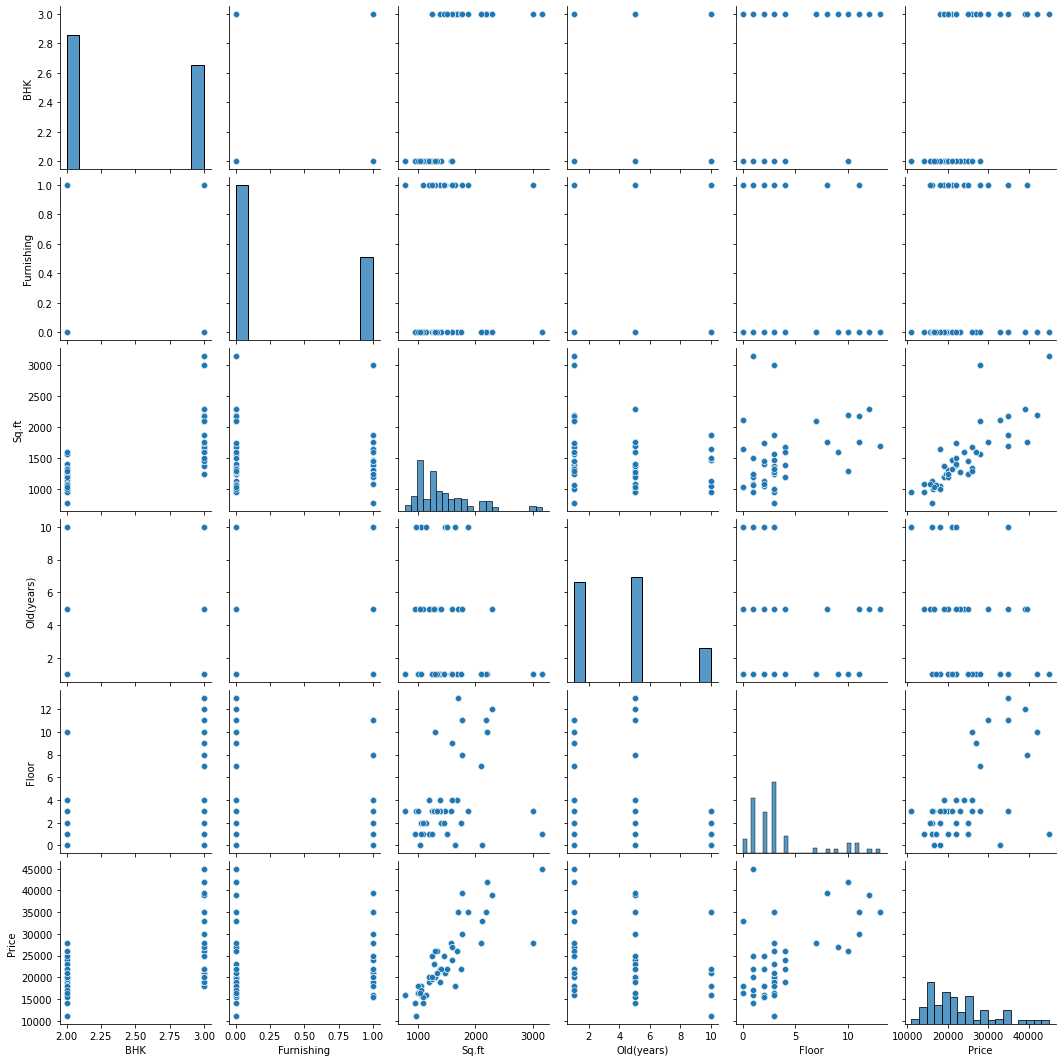

In [ ]:
sns.pairplot(data)

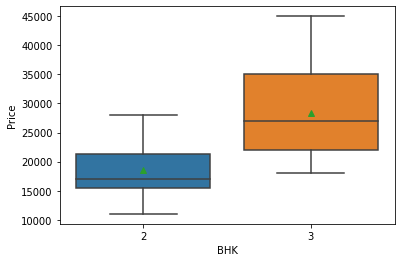

In [ ]:
sns.boxplot(x="BHK",y="Price",data=data,showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.61627253199439

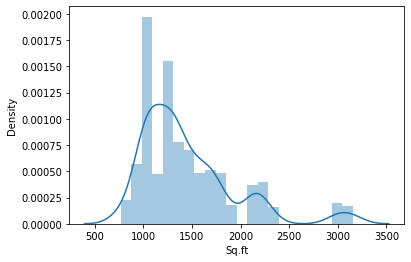

In [ ]:
sns.distplot(data["Sq.ft"])#skewness=1.5518440244097458
data["Sq.ft"].skew()
data["Sq.ft"].kurtosis()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


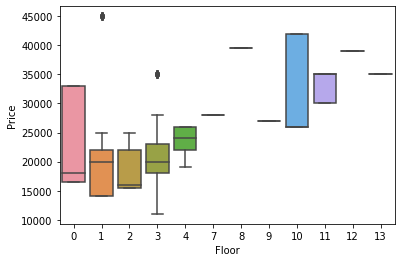

In [ ]:
sns.boxplot(data["Floor"],data["Price"])#outliers

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BHK           0.258511
Furnishing    0.639164
Sq.ft         1.551844
Old(years)    0.664477
Floor         1.550051
Price         1.002736
dtype: float64

In [ ]:
nos=pd.DataFrame(data["Furnishing"].value_counts()).transpose()
nos.rename(columns={0:"Non Furnished",1:"Furnished"})


,Non Furnished,Furnished
Furnishing,652,348


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


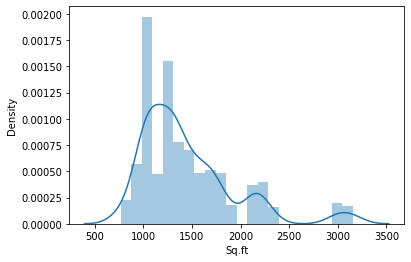

In [ ]:
sns.distplot(data["Sq.ft"])

In [ ]:
new_sqft=np.log(data["Sq.ft"])
data.drop(columns="Sq.ft", inplace=True)
data=pd.concat([data,new_sqft], axis=1)
log_old=np.log(data["Old(years)"])
data.drop(columns="Old(years)", inplace=True)
data=pd.concat([data,log_old], axis=1)
new_floor=np.sqrt(data["Floor"])
data.drop(columns="Floor",inplace=True)
data=pd.concat([data,new_floor],axis=1)
data.head()

,Location,BHK,Furnishing,Price,Sq.ft,Old(years),Floor
0,Bommanahalli,3,1,28000,8.006368,0.000000,1.732051
1,Bommanahalli,3,1,18000,7.408531,2.302585,0.000000
2,Whitefield,2,0,16400,6.907755,1.609438,1.732051
3,Whitefield,3,0,27000,7.377759,0.000000,3.000000
4,Whitefield,2,1,20000,7.090077,1.609438,1.000000


In [ ]:
def box_var(data):
    for columns in data.columns:
        sns.boxplot(x=columns,y="Price",data=data,showmeans=True)
        plt.show()

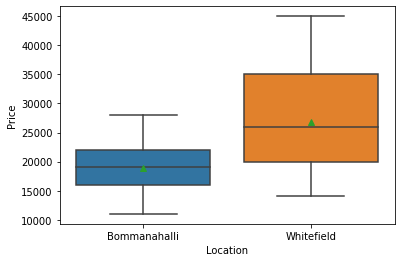

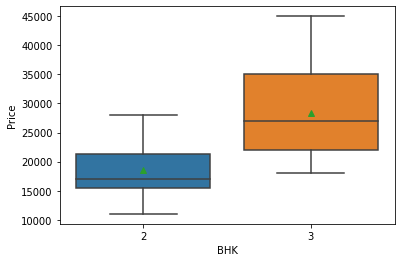

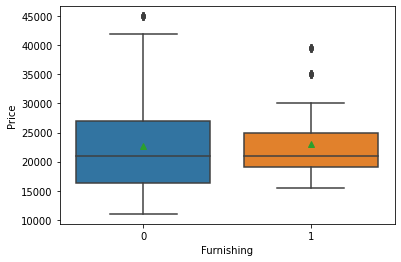

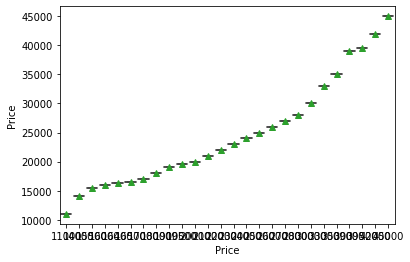

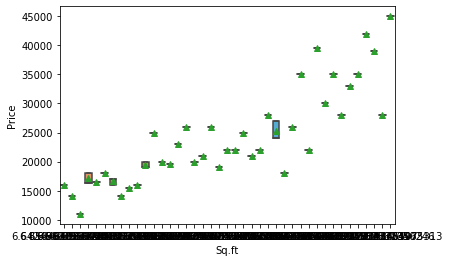

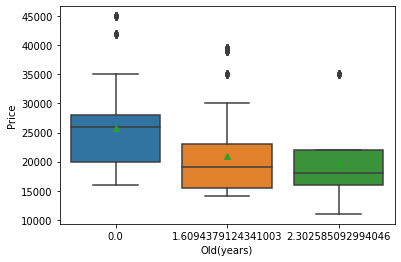

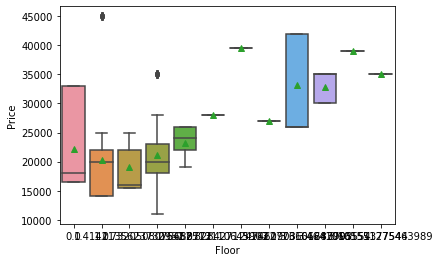

In [ ]:
box_var(data)

In [ ]:
def dist_var(data):
    for columns in data.columns:
        try:
            sns.distplot(data[columns])
            plt.show()
        except:
            continue

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


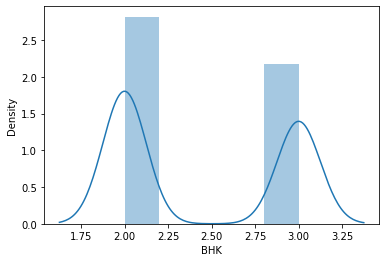

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


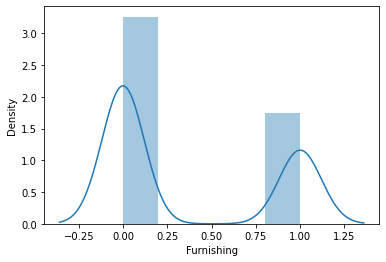

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


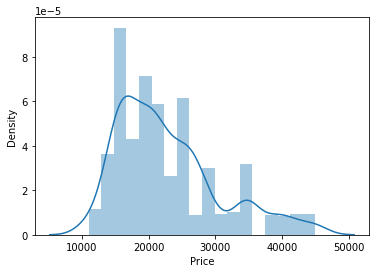

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


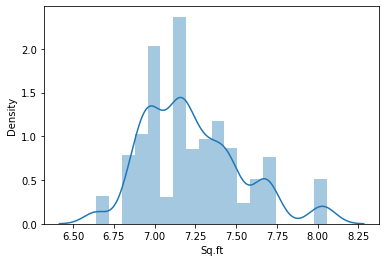

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


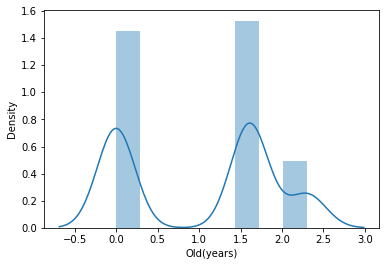

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


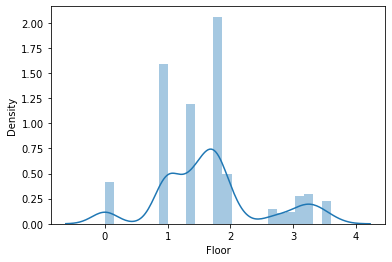

In [ ]:
dist_var(data)

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BHK           0.258511
Furnishing    0.639164
Price         1.002736
Sq.ft         0.697189
Old(years)   -0.119370
Floor         0.495310
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


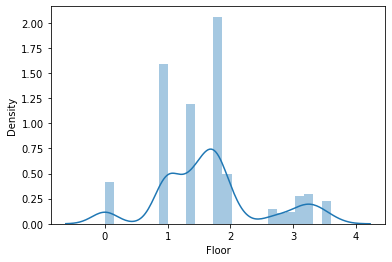

In [ ]:
sns.distplot(data["Floor"])

In [ ]:
data["Furnishing"].value_counts()#stratified

0    652
1    348
Name: Furnishing, dtype: int64

In [ ]:
from pandas import get_dummies
locn_dummies=get_dummies(data["Location"], drop_first=True)
data=pd.concat([data,locn_dummies], axis=1)
data.drop(columns="Location", inplace=True)
data.head()

,BHK,Furnishing,Price,Sq.ft,Old(years),Floor,Whitefield
0,3,1,28000,8.006368,0.000000,1.732051,0
1,3,1,18000,7.408531,2.302585,0.000000,0
2,2,0,16400,6.907755,1.609438,1.732051,1
3,3,0,27000,7.377759,0.000000,3.000000,1
4,2,1,20000,7.090077,1.609438,1.000000,1


In [ ]:
X=data.drop(columns="Price")
y=data["Price"]
print(X.head())
print(y.head())

   BHK  Furnishing     Sq.ft  Old(years)     Floor  Whitefield
0    3           1  8.006368    0.000000  1.732051           0
1    3           1  7.408531    2.302585  0.000000           0
2    2           0  6.907755    1.609438  1.732051           1
3    3           0  7.377759    0.000000  3.000000           1
4    2           1  7.090077    1.609438  1.000000           1
0    28000
1    18000
2    16400
3    27000
4    20000
Name: Price, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
norm=MinMaxScaler()
X=sc.fit_transform(X)
X=norm.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
norm=MinMaxScaler()
X_test=sc.fit_transform(X_test)
X_test=norm.fit_transform(X_test)
X_train=sc.fit_transform(X_train)
X_train=norm.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
# reg.fit(X_train,y_train)

In [ ]:
y_pred=reg.predict(X_test)

NotFittedError: ignored

In [ ]:
from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

In [ ]:
reg.coef_

In [ ]:
data.head()

,BHK,Furnishing,Price,Sq.ft,Old(years),Floor,Whitefield
0,3,1,28000,8.006368,0.000000,1.732051,0
1,3,1,18000,7.408531,2.302585,0.000000,0
2,2,0,16400,6.907755,1.609438,1.732051,1
3,3,0,27000,7.377759,0.000000,3.000000,1
4,2,1,20000,7.090077,1.609438,1.000000,1


In [ ]:
coef=pd.DataFrame(reg.coef_)
pd.concat([pd.DataFrame(X.columns).rename(columns={0:"Name"}),coef.rename(columns={0:"Coefficient"})],axis=1)

AttributeError: ignored

In [ ]:
X.drop(columns="Old(years)",inplace=True)

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
norm=MinMaxScaler()
X_test=sc.fit_transform(X_test)
X_test=norm.fit_transform(X_test)
X_train=sc.fit_transform(X_train)
X_train=norm.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
print("R_2 score = {}".format(r2_score(y_test,y_pred)))

R_2 score = 0.8425327700890931


In [ ]:
from sklearn.model_selection import cross_val_score
knn=LinearRegression()
print(cross_val_score(knn,X,y,cv=15,scoring="r2").mean())


0.8268594890024134


In [ ]:
type(X)

numpy.ndarray

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X,y):
    X1_train,X1_test=X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index], y.iloc[test_index]
reg.fit(X1_train,y1_train)
sfc_reg_pred=reg.predict(X1_test)
r2_score(y1_test,sfc_reg_pred)

AttributeError: ignored

In [ ]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
cvs_list=[]
for lambdaa in range(0,1000):
    ridge=Ridge(alpha=lambdaa, normalize=True)
    cvs=cross_val_score(ridge,X,y,scoring="r2").mean()
    cvs_list.append(cvs)
max(cvs_list)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

0.8282140827517441

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


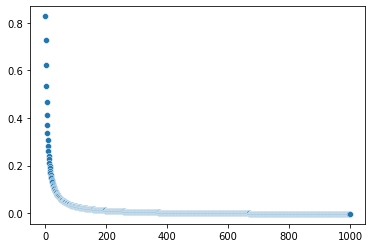

In [ ]:
sns.scatterplot(range(0,1000),cvs_list)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
#Standardizing the data
scaling=StandardScaler()
X_train_sca=scaling.fit_transform(X_train)
X_test_sca=scaling.fit_transform(X_test)


In [ ]:
model=Sequential()

#First Layer
model.add(Dense(32,activation="relu",input_dim=6))

#Second Layer
model.add(Dense(units=32,activation="sigmoid"))

#Third Layer
model.add(Dense(units=32,activation="tanh"))

#Four Layer
model.add(Dense(units=32,activation="relu"))

#Fifth Layer
model.add(Dense(units=32,activation="relu"))

#Sixth Layer
model.add(Dense(units=32,activation="sigmoid"))

#Output Layer
model.add(Dense(units=1))

#Compiling the ANN
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['mae','mse','mape'])

#Fitting the ANN to the training Dataset
model.fit(X_train_sca,y_train,batch_size=10,epochs=100)

Epoch 1/100
75/75 [==============================] - 3s 3ms/step - loss: 577142464.0000 - mae: 22790.8750 - mse: 577142464.0000 - mape: 99.9888
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 577008384.0000 - mae: 22787.9199 - mse: 577008384.0000 - mape: 99.9744
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 576951232.0000 - mae: 22786.6719 - mse: 576951232.0000 - mape: 99.9684
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 576897024.0000 - mae: 22785.4766 - mse: 576897024.0000 - mape: 99.9626
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 576843712.0000 - mae: 22784.3145 - mse: 576843712.0000 - mape: 99.9570
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 576791104.0000 - mae: 22783.1484 - mse: 576791104.0000 - mape: 99.9513
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 576738880.0000 - mae: 22782.0000 - mse: 576738880.0000 - mape: 

In [ ]:
model.evaluate(X_test_sca,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 585079808.0000 - mae: 22824.0273 - mse: 585079808.0000 - mape: 99.4381


[585079808.0, 22824.02734375, 585079808.0, 99.43806457519531]

In [ ]:
r2_score(y_test,y_pred)

0.8425327700890931